# City Data Hack Challenge 1 – Active Travel Planning
 

This notebook demonstrates the use of the Python recipe wrapper to create a basic data pack that you can use to get you started with the challenge of Active Travel Planning. If you want to know more on the Challenge you can visit our [Tombolo website](http://www.tombolo.org.uk/challenge-1-active-travel/). Don't forget that you can use the [City Data Explorer](https://tombolo-staging.emu-analytics.net) web app to visualise and style your results.



In [13]:
import geopandas as gpd
from matplotlib import pyplot as plt
%matplotlib inline
%run "/Users/tbantis/Desktop/pr1/Thanos data/digital-connector-python/recipe.py"
dc_dir = '/Desktop/TomboloDigitalConnector'


In [ ]:
### recipe's subject

subject_la = Subject(subject_type_label='localAuthority',provider_label='uk.gov.ons',
                  match_rule=Match_Rule(attribute_to_match_on="name", pattern="Islington"))

subject_lsoa = Subject(subject_type_label='lsoa',provider_label='uk.gov.ons')

subject = Subject(subject_type_label='space_syntax',provider_label='com.spacesyntax',
                  geo_match_rule=Geo_Match_Rule(geo_relation="intersects", subjects=[subject_la]))

la = Datasource(importer_class='uk.org.tombolo.importer.ons.OaImporter',
                            datasource_id='localAuthority')

lsoa = Datasource(importer_class='uk.org.tombolo.importer.ons.OaImporter',
                            datasource_id='lsoa')

openmap = Datasource(importer_class='uk.org.tombolo.importer.spacesyntax.OpenMappingImporter',
                            datasource_id='SpaceSyntaxOpenMapping')

dft_accessibility = Datasource(importer_class='uk.org.tombolo.importer.dft.AccessibilityImporter',
                            datasource_id='acs0501')



integration_2km = AttributeMatcher(label='integration2km',provider='com.spacesyntax')

travel_time_employment = AttributeMatcher(label='EMPLO008',provider='uk.gov.dft')


integration_2km_f = LatestValueField(attribute_matcher=travel_time_employment,
                                           label = 'Travel time to employment')


travel_time_employment_f = LatestValueField(attribute_matcher=integration_2km,
                                           label = 'Integration 2km')



g_travel_time_employment_f = MapToNearestSubjectField(field=travel_time_employment_f,
                                        label='NitrogenDioxide',
                                        subject = subject,
                                        max_radius = 1.)


### running DC
dataset = Dataset(subjects=[subject],
                  fields=[g_travel_time_employment_f],
                  datasources=[la,
                               lsoa,
                               openmap,
                               dft_accessibility])


recipe = Recipe(dataset,timestamp=False)
recipe.build_recipe(console_print=False)

recipe.run_recipe(tombolo_path='/Users/tbantis/Desktop/TomboloDigitalConnector',
                  clear_database_cache=False,
                  output_path = 'Desktop/test.json')

b'Starting a Gradle Daemon (subsequent builds will be faster)\n'
b':compileJava UP-TO-DATE\n'
b':processResources UP-TO-DATE\n'
b':classes UP-TO-DATE\n'
b':runExportHelp UP-TO-DATE\n'
b':runExport\n'
b'2018-03-16 12:27:53.315 [main] WARN  n.s.e.config.ConfigurationFactory - No configuration found. Configuring ehcache from ehcache-failsafe.xml  found in the classpath: jar:file:/Users/tbantis/.gradle/caches/modules-2/files-2.1/net.sf.ehcache/ehcache/2.10.3/cf74f9a4a049f181833b147a1d9aa62159c9d01d/ehcache-2.10.3.jar!/ehcache-failsafe.xml\n'
b'2018-03-16 12:27:55.355 [main] INFO  uk.org.tombolo.AbstractRunner - Setting file download cache: /tmp\n'
b"2018-03-16 12:27:55.530 [main] INFO  org.ehcache.core.EhcacheManager - Cache 'fields' created in EhcacheManager.\n"
b'2018-03-16 12:27:55.840 [main] INFO  u.o.t.importer.AbstractImporter - Skipped importing uk.org.tombolo.importer.ons.OaImporter:localAuthority as this import has been completed previously\n'
b'2018-03-16 12:27:55.841 [main] INFO

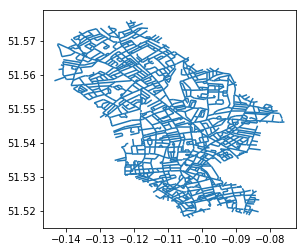

In [10]:
gdf = gpd.read_file("/Users/tbantis/Desktop/test.json")
gdf.plot()